In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import (
    EfficientNetB0, EfficientNetB1, EfficientNetB2,
    EfficientNetB3, EfficientNetB4, EfficientNetB5,
    EfficientNetB6, EfficientNetB7
)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score


In [2]:
# Set paths for your dataset
base_dir = r"D:\PROJECTS\aortic aneurysm\dataset"  # Updated to your dataset directory
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Define parameters
img_size = (224, 224)
batch_size = 8  # Adjust as needed

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


Found 268 images belonging to 2 classes.
Found 268 images belonging to 2 classes.


In [3]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/11.0 MB 6.1 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.0 MB 6.1 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 5.7 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 5.7 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 5.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
    --------------------------------------- 1.0/44.8 MB 6.3 MB/s eta 0:00:07
   -- ----

In [3]:
def train_efficientnet(model_name, train_generator, validation_generator, class_weights_dict, epochs=10):
    # Load the appropriate EfficientNet variant
    if model_name == 'EfficientNetB0':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB1':
        base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB2':
        base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB3':
        base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB4':
        base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB5':
        base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB6':
        base_model = EfficientNetB6(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    elif model_name == 'EfficientNetB7':
        base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Unfreeze all layers for fine-tuning
    for layer in base_model.layers:
        layer.trainable = True

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        class_weight=class_weights_dict,
        callbacks=[early_stopping]
    )

    return history


In [9]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def train_efficientnet_b7(train_generator, validation_generator, class_weights_dict, epochs=10):
    # Load the EfficientNetB7 model
    base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Unfreeze all layers for fine-tuning
    for layer in base_model.layers:
        layer.trainable = True

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        class_weight=class_weights_dict,
        callbacks=[early_stopping]
    )

    # Save the trained model
    model.save('efficientnet_b7_model.h5')
    print("Model saved as 'efficientnet_b7_model.h5'")

    return history

# Example usage
# train_efficientnet_b7(train_generator, validation_generator, class_weights_dict, epochs=10)


In [10]:
# List of EfficientNet versions
model_names = ['EfficientNetB7']

# Dictionary to store histories of each model
histories = {}

for model_name in model_names:
    print(f"Training {model_name}...")
    history = train_efficientnet(model_name, train_generator, validation_generator, class_weights_dict, epochs=10)
    histories[model_name] = history
    print(f"Finished training {model_name}.\n")


Training EfficientNetB7...
Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 368s 7s/step - accuracy: 0.5751 - loss: 0.6903 - val_accuracy: 0.5896 - val_loss: 0.6839
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 227s 7s/step - accuracy: 0.7889 - loss: 0.6270 - val_accuracy: 0.5896 - val_loss: 0.6828
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 228s 7s/step - accuracy: 0.7867 - loss: 0.5743 - val_accuracy: 0.5970 - val_loss: 0.6889
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 239s 7s/step - accuracy: 0.8707 - loss: 0.5181 - val_accuracy: 0.5858 - val_loss: 0.6844
Epoch 5/10
33/34 ━━━━━━━━━━━━━━━━━━━━ 5s 6s/step - accuracy: 0.9100 - loss: 0.4324 

AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/functional_7_1/block6l_project_conv_1/convolution defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_ops.cc:1112
	 [[{{node StatefulPartitionedCall/functional_7_1/block6l_project_conv_1/convolution}}]] [Op:__inference_one_step_on_iterator_886916]

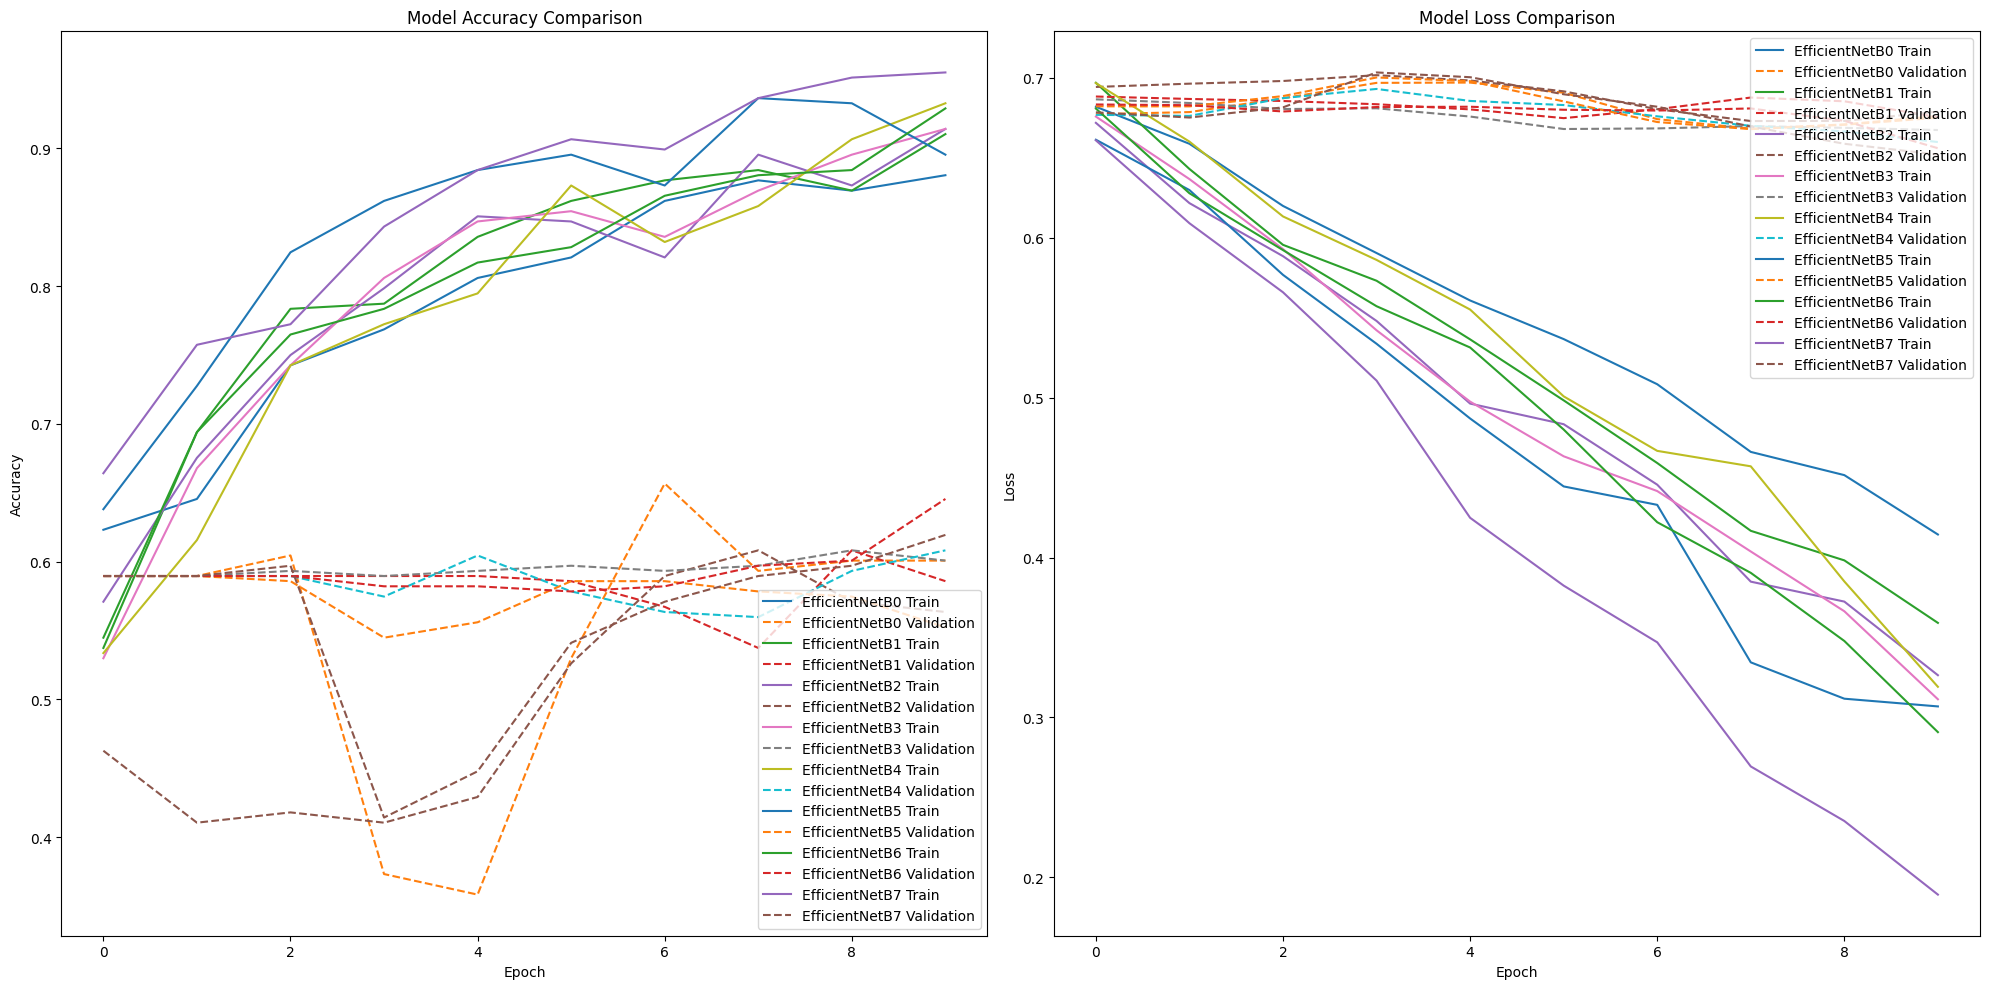

In [8]:
import matplotlib.pyplot as plt

# Assuming 'histories' is a dictionary containing training histories for all models
# Example: histories = {'EfficientNetB0': history_b0, 'EfficientNetB1': history_b1, ...}

# List of model names
model_names = ['EfficientNetB0','EfficientNetB1','EfficientNetB2','EfficientNetB3','EfficientNetB4', 'EfficientNetB5', 
               'EfficientNetB6','EfficientNetB7']

# Plotting accuracy and loss for all models
plt.figure(figsize=(20, 10))

# Accuracy plots
plt.subplot(1, 2, 1)
for model_name in model_names:
    plt.plot(histories[model_name].history['accuracy'], label=f'{model_name} Train')
    plt.plot(histories[model_name].history['val_accuracy'], label=f'{model_name} Validation', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plots
plt.subplot(1, 2, 2)
for model_name in model_names:
    plt.plot(histories[model_name].history['loss'], label=f'{model_name} Train')
    plt.plot(histories[model_name].history['val_loss'], label=f'{model_name} Validation', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

TypeError: 'History' object is not subscriptable

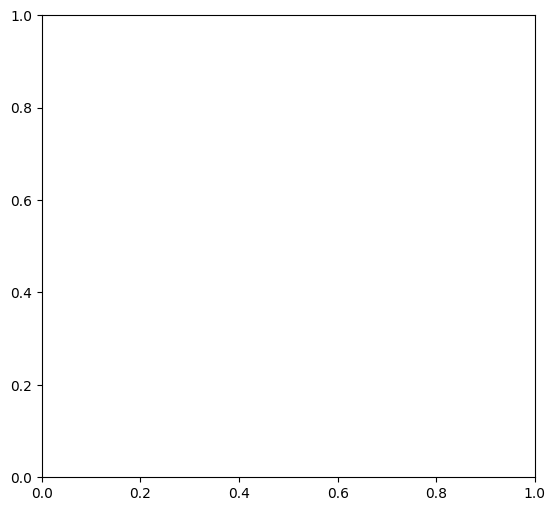

In [11]:
import matplotlib.pyplot as plt

def plot_histories(histories):
    plt.figure(figsize=(14, 6))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for model_name, history in histories.items():
        plt.plot(history['accuracy'], label=f'{model_name} Train')
        plt.plot(history['val_accuracy'], label=f'{model_name} Validation', linestyle='dashed')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    for model_name, history in histories.items():
        plt.plot(history['loss'], label=f'{model_name} Train')
        plt.plot(history['val_loss'], label=f'{model_name} Validation', linestyle='dashed')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_histories(histories)


TypeError: 'History' object is not subscriptable

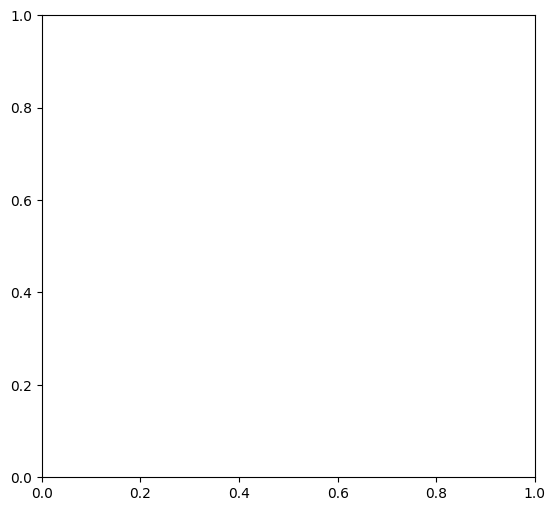

In [10]:
import matplotlib.pyplot as plt

def plot_histories(histories):
    plt.figure(figsize=(14, 6))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for model_name, history in histories.items():
        plt.plot(history['accuracy'], label=f'{model_name} Train')
        plt.plot(history['val_accuracy'], label=f'{model_name} Validation', linestyle='dashed')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    for model_name, history in histories.items():
        plt.plot(history['loss'], label=f'{model_name} Train')
        plt.plot(history['val_loss'], label=f'{model_name} Validation', linestyle='dashed')
    plt.title('Model Loss Comparison')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_histories(histories)


TypeError: 'History' object is not subscriptable

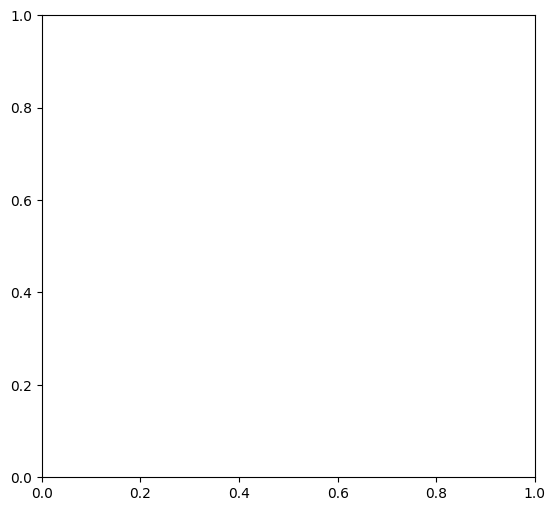

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_histories(histories):
    plt.figure(figsize=(14, 6))

    # Combined Accuracy Plot
    plt.subplot(1, 2, 1)
    for model_name, history in histories.items():
        # Average training and validation accuracy
        avg_accuracy = np.mean([history['accuracy'], history['val_accuracy']], axis=0)
        plt.plot(avg_accuracy, label=f'{model_name} Combined')
    plt.title('Combined Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Combined Loss Plot
    plt.subplot(1, 2, 2)
    for model_name, history in histories.items():
        # Average training and validation loss
        avg_loss = np.mean([history['loss'], history['val_loss']], axis=0)
        plt.plot(avg_loss, label=f'{model_name} Combined')
    plt.title('Combined Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the updated plotting function
plot_combined_histories(histories)


In [17]:
# Manually reconstructed histories for EfficientNet B0 to B6
histories = {
    'EfficientNetB0': {
        'accuracy':[0.5941, 0.6964, 0.7428, 0.7452, 0.8012, 0.8065, 0.8556, 0.8738, 0.8947, 0.9154],
    'val_accuracy':[0.5896, 0.5896, 0.6045, 0.3731, 0.3582, 0.5299, 0.6567, 0.5933, 0.6007, 0.6007],
    'loss':[0.6864, 0.6331, 0.6203, 0.5937, 0.5702, 0.5453, 0.5221, 0.4606, 0.4346, 0.4095],
    'val_loss':[0.6773, 0.6786, 0.6872, 0.6969, 0.6971, 0.6907, 0.6742, 0.6682, 0.6709, 0.6762],
    },
    'EfficientNetB1': {
        'accuracy':[0.4469, 0.6242, 0.8052, 0.7574, 0.7783, 0.8343, 0.8559, 0.8727, 0.8757, 0.8911],
    'val_accuracy':[0.5896, 0.5896, 0.5896, 0.5896, 0.5896, 0.5858, 0.5672, 0.5373, 0.6082, 0.5858],
    'loss':[0.7258, 0.6656, 0.5926, 0.5990, 0.5523, 0.5101, 0.4742, 0.4274, 0.3930, 0.3631],
    'val_loss':[0.6883, 0.6868, 0.6855, 0.6835, 0.6803, 0.6748, 0.6804, 0.6877, 0.6854, 0.6754],
    },
    'EfficientNetB2': {
         'accuracy':[0.5754, 0.6369, 0.7079, 0.7946, 0.8710, 0.8369, 0.7931, 0.8954, 0.8399, 0.9196],
    'val_accuracy':[0.4627, 0.4104, 0.4179, 0.4104, 0.4291, 0.5261, 0.5896, 0.6082, 0.5709, 0.5634],
    'loss':[0.6743, 0.6377, 0.6026, 0.5549, 0.4913, 0.4889, 0.4674, 0.3886, 0.3870, 0.3344],
    'val_loss':[0.6943, 0.6964, 0.6981, 0.7017, 0.6984, 0.6916, 0.6804, 0.6730, 0.6731, 0.6789],
    },
    'EfficientNetB3': {
        'accuracy':[0.4854, 0.5996, 0.7361, 0.8164, 0.8436, 0.8440, 0.8188, 0.8802, 0.9136, 0.9244],
    'val_accuracy':[0.5896, 0.5896, 0.5933, 0.5896, 0.5933, 0.5970, 0.5933,0.5970,0.6082, 0.6007],
    'loss':[0.6810, 0.6537, 0.5948, 0.5586, 0.5070, 0.4672, 0.4417, 0.4179, 0.3439, 0.3190],
    'val_loss':[0.6866, 0.6843, 0.6805, 0.6810, 0.6758, 0.6680, 0.6684, 0.6699, 0.6688, 0.6674],
    },
    'EfficientNetB4': {
        'accuracy':[0.5232, 0.5798, 0.7403, 0.7231, 0.7870, 0.8547, 0.8220, 0.8486, 0.8806, 0.9337],
    'val_accuracy':[0.5896, 0.5896, 0.5896, 0.5746, 0.6045, 0.5784, 0.5634, 0.5597, 0.5933, 0.6082],
    'loss':[0.6982, 0.6890, 0.6294, 0.5849, 0.5720, 0.5060, 0.4703, 0.4856, 0.4096, 0.3372],
    'val_loss':[0.6769, 0.6762, 0.6874, 0.6931, 0.6856, 0.6830, 0.6760, 0.6700, 0.6665, 0.6599],
    },
    'EfficientNetB5': {
        'accuracy':[0.6401, 0.6640, 0.8008,0.8368, 0.8443, 0.9053, 0.8847, 0.9512, 0.9312, 0.9063],
    'val_accuracy':[0.5896, 0.5896, 0.5858, 0.5448, 0.5560, 0.5858, 0.5858, 0.5784, 0.5746, 0.5522],
    'loss':[0.6876, 0.6454, 0.5987, 0.5452, 0.5054, 0.4553, 0.4282, 0.3466, 0.3192, 0.3050],
    'val_loss':[0.6822, 0.6822, 0.6886, 0.7003, 0.6980, 0.6853, 0.6724, 0.6679, 0.6707, 0.6751],
    },
    'EfficientNetB6': {
        'accuracy': [0.4831, 0.6460, 0.7719, 0.7710, 0.8145, 0.8438, 0.8300, 0.9077, 0.8606, 0.9269],
        'val_accuracy': [0.5896, 0.5896, 0.5896, 0.5821, 0.5821, 0.5784, 0.5821, 0.5970, 0.6007, 0.6455],
        'loss': [0.6916, 0.6439, 0.6046, 0.5756, 0.5220, 0.4895, 0.4437, 0.3920, 0.3723, 0.3166],
        'val_loss': [0.6834, 0.6829, 0.6790, 0.6818, 0.6820, 0.6801, 0.6796, 0.6809, 0.6731, 0.6560],
    },
    'EfficientNetB7': {
        'accuracy': [0.6228, 0.7188, 0.7664, 0.8199, 0.8584, 0.9048, 0.8615, 0.9356, 0.9545, 0.9613],
        'val_accuracy': [0.5896, 0.5896,0.5970, 0.4142, 0.4478, 0.5410, 0.5709, 0.5896, 0.5970, 0.6194],
        'loss': [0.6900, 0.6220, 0.5697, 0.5260, 0.4536, 0.4058, 0.3638, 0.2737, 0.2229, 0.1856],
        'val_loss': [0.6785, 0.6752, 0.6816, 0.7034, 0.7004, 0.6898, 0.6820, 0.6696, 0.6588, 0.6520],
    },
}


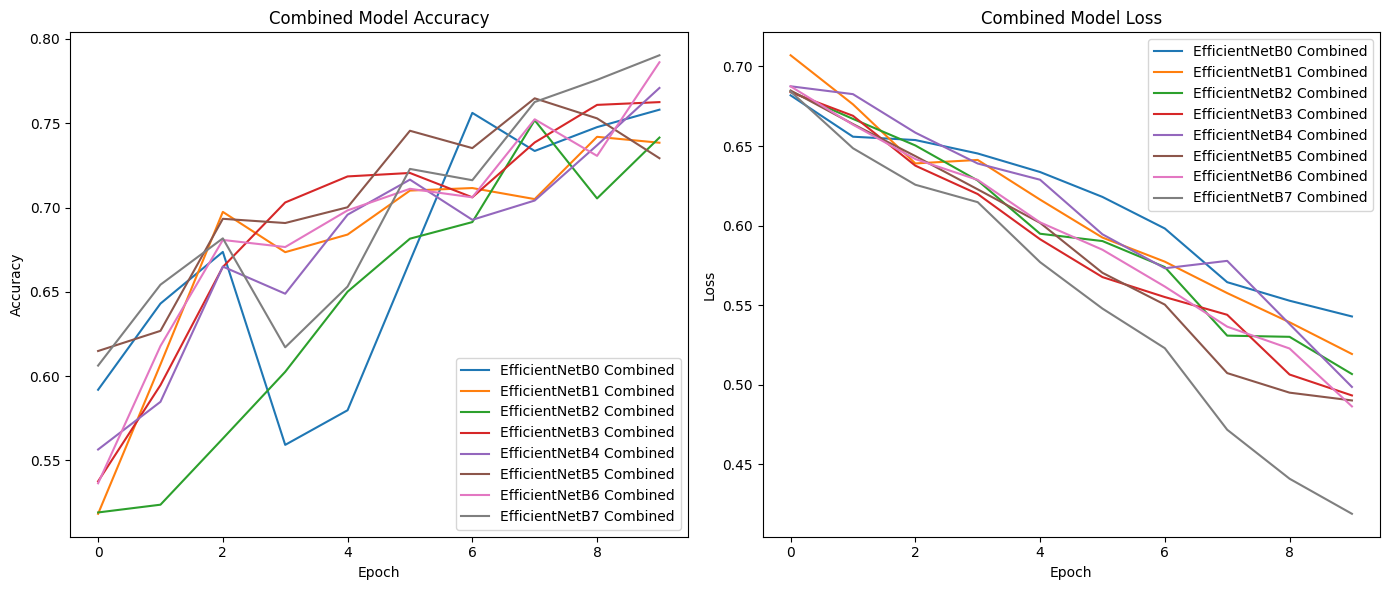

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_histories(histories):
    plt.figure(figsize=(14, 6))

    # Combined Accuracy Plot
    plt.subplot(1, 2, 1)
    for model_name, history in histories.items():
        # Average training and validation accuracy
        avg_accuracy = np.mean([history['accuracy'], history['val_accuracy']], axis=0)
        plt.plot(avg_accuracy, label=f'{model_name} Combined')
    plt.title('Combined Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Combined Loss Plot
    plt.subplot(1, 2, 2)
    for model_name, history in histories.items():
        # Average training and validation loss
        avg_loss = np.mean([history['loss'], history['val_loss']], axis=0)
        plt.plot(avg_loss, label=f'{model_name} Combined')
    plt.title('Combined Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the updated plotting function
plot_combined_histories(histories)


In [3]:
import tensorflow as tf


In [4]:
model = tf.keras.models.load_model('aneurysm_detection_model.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'aneurysm_detection_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [4]:
pip install numpy tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\nverm\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the trained EfficientNet model
# Assume we have a pre-trained model saved as 'aneurysm_detection_model.h5'
model_path = "aneurysm_detection_model.h5"  # Update with your model path
model = tf.keras.models.load_model(model_path)

# Helper function to preprocess the image
def preprocess_image(image_path):
    """
    Preprocess the input image: Resize, normalize, and add batch dimension.
    """
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (224, 224))  # Resize to model's input size (adjust as necessary)
    img = img / 255.0  # Normalize to [0, 1]
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Helper function to predict aneurysm presence and classify stage
def predict_aneurysm(image_path):
    """
    Predict whether there is an aneurysm, and if so, classify its stage and size.
    """
    # Preprocess image
    img = preprocess_image(image_path)
    
    # Predict using the model
    prediction = model.predict(img)
    
    # Assuming the model's output structure:
    # Output 1: Binary classification (0: No Aneurysm, 1: Aneurysm)
    # Output 2: Regression (size of the aneurysm in cm)
    aneurysm_present = prediction[0][0] > 0.5  # Threshold for aneurysm detection
    aneurysm_size = prediction[1][0]  # Size in cm (output from model regression)

    if aneurysm_present:
        # Determine stage based on size
        if 3.0 <= aneurysm_size < 4.0:
            stage = "Stage I"
        elif 4.0 <= aneurysm_size < 5.0:
            stage = "Stage II"
        elif 5.0 <= aneurysm_size < 5.5:
            stage = "Stage III"
        elif aneurysm_size >= 5.5:
            stage = "Stage IV"
        else:
            stage = "Unknown Stage"
        return f"Yes, Aneurysm Detected. Size: {aneurysm_size:.2f} cm, {stage}"
    else:
        return "No, No Aneurysm Detected."

# Main function to take user input
def main():
    """
    Main function to take user input, process the image, and provide results.
    """
    print("Please provide the path to your CT scan image:")
    image_path = input("Enter image path: ").strip()

    try:
        # Display the input image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap='gray')
        plt.title("Input CT Scan Image")
        plt.show()

        # Get prediction
        result = predict_aneurysm(image_path)
        print("Prediction Result:", result)

    except Exception as e:
        print(f"Error processing the image: {e}")

# Run the program
if __name__ == "__main__":
    main()


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'aneurysm_detection_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [7]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\nverm\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip
